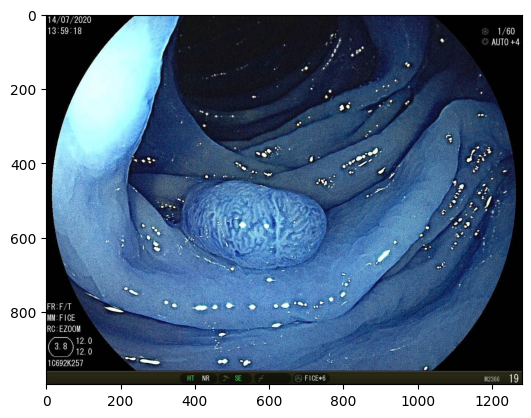

In [20]:
from PIL import Image
import numpy as np
from torchvision.transforms import functional as TF
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(
    "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/images/bkai-polyp/1.jpg"
)
mask = cv2.imread(
    "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/masks/bkai-polyp/1.png",
    cv2.IMREAD_GRAYSCALE,
)
_, mask = cv2.threshold(mask, 10, maxval=1, type=cv2.THRESH_BINARY)
plt.imshow(image)
# Image.fromarray(mask * 255)
# mask =  cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)

([0.023450747744407367,
  0.013582993449511803,
  0.03984921517735756,
  0.07707081942899519,
  0.0096403411197627,
  0.08912371771103696,
  0.49830923248053394,
  0.061317513286367566,
  0.04660239772586825],
 404550)

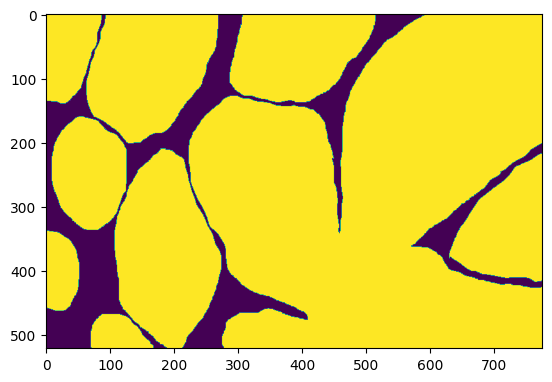

In [64]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread(
    "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/gland_segmentation_of_haematoxylin_and_eosin/train/images/train_20.bmp",
    cv2.IMREAD_GRAYSCALE,
)
mask = cv2.imread(
    "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/gland_segmentation_of_haematoxylin_and_eosin/Warwick QU Dataset (Released 2016_07_08)/testA_1_anno.bmp",
    cv2.IMREAD_GRAYSCALE,
)
masks_id, masks_area = np.unique(mask, return_counts=True)
thresh = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)[1]
img_area = mask.shape[0] * mask.shape[1]

cont_areas = []

for id, area in zip(masks_id, masks_area):
    if id == 0:
        continue
    cont_areas.append(area / img_area)

plt.imshow(thresh)
cont_areas, img_area

In [1]:
import glob
import pandas as pd
import os
from num2words import num2words
import json
import cv2
import numpy as np

dataset_path = "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/gland_segmentation_of_haematoxylin_and_eosin/train"
csv_path = "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/gland_segmentation_of_haematoxylin_and_eosin/Warwick QU Dataset (Released 2016_07_08)/Grade.csv"
images = glob.glob(dataset_path + "/images/*")
df = pd.read_csv(csv_path)
key1, key2 = df.columns[2:]
text_anns = []
patches = 0
for image_path in images:
    image_name = os.path.basename(image_path)
    mask_path = dataset_path + "/masks/" + image_name.replace(".bmp", "_anno.bmp")
    mask_name = os.path.basename(mask_path)
    image_id = image_name.split(".")[0]

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    thresh = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)[1]
    cv2.imwrite(mask_path, thresh)

    df_row = df.loc[df["name"] == image_id].iloc[0]
    text = f"{df_row[key1]}, {df_row[key2]}"

    img_area = mask.shape[0] * mask.shape[1]
    sizes = []

    masks_id, masks_area = np.unique(mask, return_counts=True)
    patches += len(masks_id - 1)

    for id, area in zip(masks_id, masks_area):
        if id == 0:
            continue
        norm_area = area / img_area
        if norm_area > 0.3:
            sizes.append("large")
        elif norm_area > 0.08:
            sizes.append("medium")
        elif norm_area > 0.01:
            sizes.append("small")
        else:
            sizes.append("tiny")

    large_count = num2words(sizes.count("large"))
    medium_count = num2words(sizes.count("medium"))
    small_count = num2words(sizes.count("small"))
    tiny_count = num2words(sizes.count("tiny"))

    if large_count != "zero":
        text = f"{text}, {large_count} large sized glands"
    if medium_count != "zero":
        text = f"{text}, {medium_count} medium sized glands"
    if small_count != "zero":
        text = f"{text}, {small_count} small sized glands"
    if tiny_count != "zero":
        text = f"{text}, {tiny_count} tiny sized glands"
    text = f"{text} in the image of hematoxylin and eosin histopathology"
    text_anns.append(
        dict(
            bbox=[],
            cat=0,
            segment_id=image_id,
            img_name=image_name,
            sentences=[{"idx": 0, "sent_id": 0, "sent": text}],
            sentences_num=1,
            mask_name=mask_name,
        )
    )

with open(dataset_path + "/text_anns.json", "w") as fp:
    json.dump(text_anns, fp)

170

In [ ]:
import glob
import pandas as pd
import os
import json
import cv2
import numpy as np

In [15]:
import cv2

img = cv2.imread(
    "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/gland_segmentation_of_haematoxylin_and_eosin/testB/images/testB_13.bmp"
)

imread_('/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/gland_segmentation_of_haematoxylin_and_eosin/testB/images/testB_13.bmp'): can't read data: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/bitstrm.cpp:110: error: (-2:Unspecified error) Unexpected end of input stream in function 'readBlock'



In [7]:
import json

file_path = "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/anns/clinicdb-polyp/train.json"
with open(file_path, "r") as fp:
    anns = json.load(fp)

for idx, ann in enumerate(anns):
    ann["mask_name"] = f"{ann['segment_id']}.png"
    anns[idx] = ann

with open(file_path, "w") as fp:
    json.dump(anns, fp)

In [80]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

transform = A.Compose(
    [
        A.RandomResizedCrop(width=224, height=224, scale=(0.9, 1.0)),
        A.Normalize(),
        ToTensorV2(),
    ]
)
# transform = A.Compose([A.RandomResizedCrop(width=224, height=224, scale=(0.9, 1.0)), A.Normalize()])
A.HorizontalFlip()
print(image.shape)
transformed = transform(image=image, mask=mask)

print(transformed["image"].shape)
Image.fromarray(transformed["mask"] * 255)
plt.imshow(image)

(995, 1280, 3)
torch.Size([3, 224, 224])


AttributeError: 'Tensor' object has no attribute '__array_interface__'

(tensor(0.4734), tensor(0.3101))

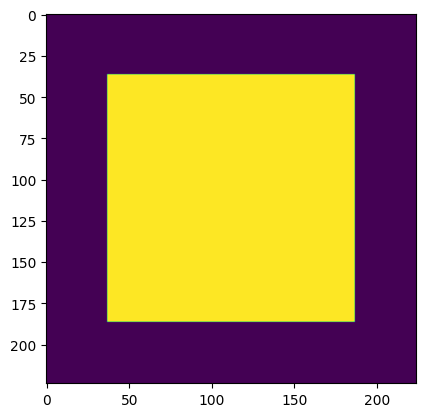

In [13]:
import torch
import matplotlib.pyplot as plt
from monai.metrics.meandice import compute_dice
from monai.metrics.meaniou import compute_iou
import numpy as np

patch_size = 150
pad_size = (224 - patch_size) // 2
target = np.pad(
    np.ones((patch_size, patch_size)), pad_size, "constant", constant_values=0
)
# print(np.expand_dims(target, axis=0).shape)
target = np.expand_dims(target, axis=0).repeat(32, axis=0)
pred = np.random.randint(0, 2, (32, 224, 224))
plt.imshow(target[0])
dice = compute_dice(torch.tensor(pred)[:, None], torch.tensor(target)[:, None]).mean()
iou = compute_iou(torch.tensor(pred)[:, None], torch.tensor(target)[:, None]).mean()
dice, iou

IndexError: index out of range in self

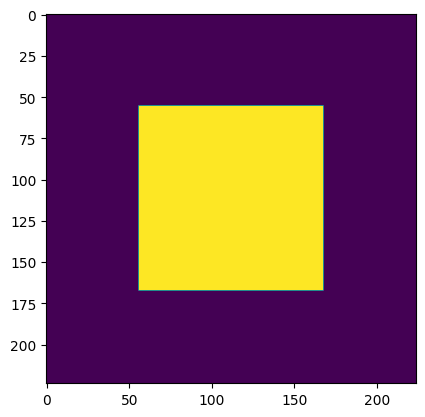

In [41]:
import torch
import matplotlib.pyplot as plt
from torchmetrics.functional import dice, jaccard_index
from torchmetrics import Dice, JaccardIndex
from torchmetrics.classification import BinaryJaccardIndex
import numpy as np

j_idx = JaccardIndex(num_classes=1, task="binary")
b_j_idx = BinaryJaccardIndex()

patch_size = 112
pad_size = (224 - patch_size) // 2
target = np.pad(
    np.ones((patch_size, patch_size)), pad_size, "constant", constant_values=0
)
pred = np.random.randint(0, 2, (224, 224))
plt.imshow(target)
d_score = dice(
    torch.tensor(pred, dtype=torch.int),
    torch.tensor(target, dtype=torch.int),
    average="none",
    num_classes=2,
)
val_j_idx = j_idx(
    torch.tensor(pred, dtype=torch.int), torch.tensor(target, dtype=torch.int)
)
val_b_j_idx = b_j_idx(
    torch.tensor(pred, dtype=torch.int), torch.tensor(target, dtype=torch.int)
)
d_score, val_j_idx, val_b_j_idx

In [7]:
target.shape, pred.shape

((224, 224), (224, 224))

In [3]:
import json
from tqdm import tqdm
from random import sample

file_path = "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/polyps/anns/bkai_polyp_80_10_10/train.json"
with open(file_path, "r") as fp:
    anns = json.load(fp)

candidates = []
for idx, ann in tqdm(enumerate(anns)):
    prompts = ann["prompts"]
    prompt = " ".join([v for k, v in prompts.items() if type(v) == str and k in ["p2"]])
    if prompt not in candidates:
        candidates.append(prompt)

(len(candidates), candidates)

# candidates = sample(candidates, 20)
# candidates

800it [00:00, 364207.45it/s]


(41,
 ['oval polyp',
  'circle polyp',
  'rectangle polyp',
  'kidney polyp',
  'round polyp',
  'square polyp',
  'flat polyp',
  'a semicircle polyp',
  'triangle polyp',
  'triangular polyp',
  'a protrusion polyp',
  'middle of the ear polyp',
  'a triangular shape polyp',
  'it is a round shape polyp',
  'it is a circle polyp',
  'a triangle polyp',
  'a heart shape polyp',
  'no polyp',
  'heart polyp',
  'rectangular polyp',
  'a circle polyp',
  'a teardrop polyp',
  'a square polyp',
  'a rectangle polyp',
  'an oval polyp',
  'it is round polyp',
  'stomach polyp',
  'teat polyp',
  'semicircle polyp',
  'bottom of ear polyp',
  'a kidney polyp',
  'middle polyp',
  'thyroid gland polyp',
  'end of ear polyp',
  'center of the human body polyp',
  'it is a rectangle polyp',
  'right ear polyp',
  'mouth polyp',
  'end of stomach polyp',
  'a cyst polyp',
  'triangular shape polyp'])